In [153]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt


# from matplotlib.patches import Patch
# import numpy as np

In [ ]:

# open and format presidents.csv (graciously provided by Lou Acresti @ https://gist.github.com/namuol)
# https://www.dolthub.com/repositories/topicalsource/countries/data/main/leaders


presidents_csv = "countries_main_1765256462720.csv"
jobs_csv = "jobs.csv"


# open and format jobs.csv (https://data.bls.gov/pdq/SurveyOutputServlet)

month_keys = sorted(monthly_jobs.keys())

In [ ]:
# pairs = {}

# for start_date, start_jobs in monthly_jobs.items():
#     for end_date, end_jobs in monthly_jobs.items():
#         pairs[(start_date, end_date)] = end_jobs - start_jobs

# # 1961 52 years

# keys_1961 = [
#     k for k in pairs.keys()
#     if k[0].year == 1961
# ]

# filterd_pairs = {k: v for k,v in pairs.items() if k in keys_1961}
# print(len(filterd_pairs))

# filterd_pairs_2 = {k: v for k, v in filterd_pairs.items() if k[0] < k[1]}
# print(len(filterd_pairs_2))

# filterd_pairs_3 = {
#     k: v for k, v in filterd_pairs_2.items()
#     if v > 60000000
#     and v < 75000000
# }
# filterd_pairs_4 = {
#     k: v for k, v in filterd_pairs_3.items()
#     if k[1] > k[0] + relativedelta(years=50)
# }

# print(len(filterd_pairs_4))
# # filterd_pairs_4

# filterd_pairs_5 = {
#     k: v for k, v in filterd_pairs_4.items()
#     if k[0].year == 1961
#     and k[1].year == 2012
#     and k[1].month == 9
#     and k[1].day == 1
# }
# filterd_pairs_5

In [ ]:
# years to collect

# sep 1st, 1961 to sep 1st 2012 - 66,681,000 (year he mentioned to when he gave his speech) 51 years
# jan 1st, 1961 to jan 1st 2013 -            (starting at the year he mentioned with a length of 52 years, after he gave the speech)
# sep 1st, 1960 to sep 1st 2012 -            (when he gave his speech and going back 52 years)


In [236]:
def get_jobs_created(dates: tuple) -> int:
    if len(dates) != 2:
        raise ValueError("Please provide two dates")
    
    for date in dates:
        if not isinstance(date, dt.date):
            raise ValueError(f"Input must be of {type(dt.date())}")

    if dates[0] == dates[1]:
        return 0

    if dates[0] < dates[1]:
        start_date = dates[0]
        end_date = dates[1]
    else:
        start_date = dates[1]
        end_date = dates[0]

    print(f"looking for number of jobs created between {start_date.strftime('%m/%d/%Y')} - {end_date.strftime('%m/%d/%Y')}")
    jobs_at_start = monthly_jobs.get(start_date)
    jobs_at_end = monthly_jobs.get(end_date)

    num_jobs = jobs_at_end - jobs_at_start

    print(num_jobs)
    return num_jobs


In [ ]:
# year he mentioned to when he gave his speech (51 years)
span_1 = get_jobs_created((dt.date(1961, 9, 1), dt.date(2012, 9, 1)))

In [ ]:
# starting at the year he mentioned with a length of 52 years, after he gave the speech
span_2 = get_jobs_created((dt.date(1961, 1, 1), dt.date(2013, 1, 1)))

In [ ]:
# when he gave his speech and going back 52 years
span_3 = get_jobs_created((dt.date(1960, 9, 1), dt.date(2012, 9, 1)))

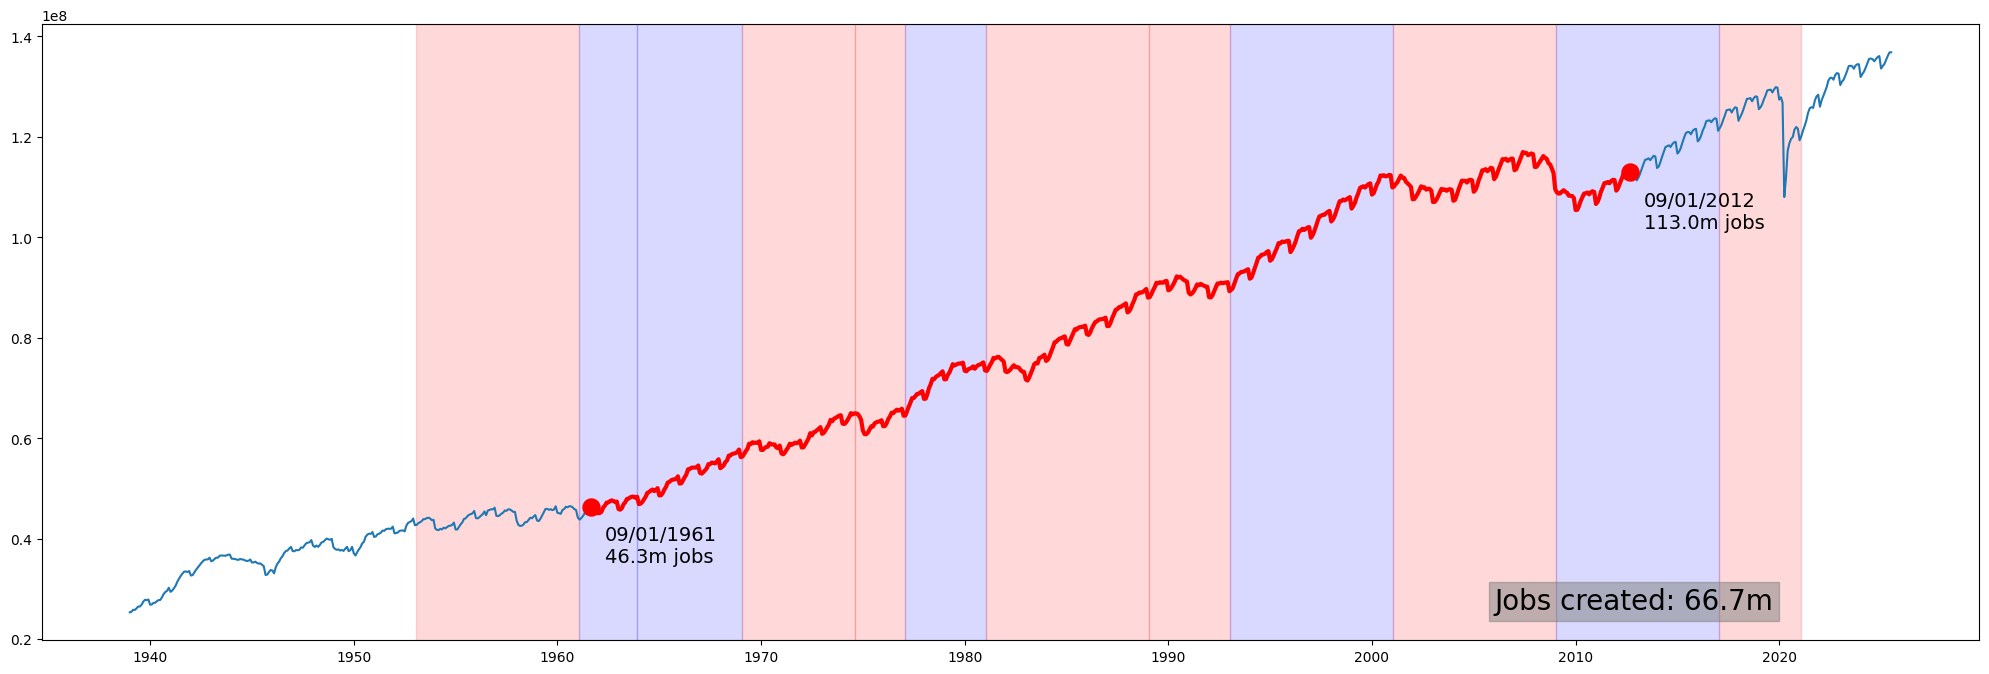

In [ ]:
def get_graph_highlighting_parties(jobs, presidents):
    figure = plt.figure(figsize=(25,8))
    axes = figure.add_subplot()
    axes.plot(jobs.keys(), jobs.values())

    color_map = color_map = {"democratic": "blue", "republican": "red"}
    party_changes = []
    for index, row in presidents.iterrows():

        term_start = row['term_start']
        term_end = row['term_end']
        party = row['party']

        if index == 0 or (len(party_changes) > 0 and party != party_changes[-1][1]):
            party_changes.append((term_start, party))

        if party in color_map:
            color = color_map[party]
            axes.axvspan(term_start, term_end, alpha=0.15, color=color)

    return figure


def highlight_period(figure, dates):

    dates_to_highlight = {
        k: v for k, v in monthly_jobs.items()
        if dates[0] <= k <= dates[1]
    }

    axes = figure.get_axes()[0]
    axes.plot(dates_to_highlight.keys(), dates_to_highlight.values(), linewidth=3, color='red')
    
    first_key = next(iter(dates_to_highlight))
    last_key = next(reversed(dates_to_highlight))
        
    axes.scatter(
        [first_key, last_key],
        [dates_to_highlight.get(first_key), dates_to_highlight.get(last_key)],
        color="red",
        s=150,
        zorder=5
    )

    axes.annotate(
        f"{first_key.strftime('%m/%d/%Y')}\n{dates_to_highlight.get(first_key) / 1_000_000:<.1f}m jobs",
        xy=(first_key, dates_to_highlight.get(first_key)),
        xytext=(10, -40),
        textcoords='offset points',
        fontsize=14
    )

    axes.annotate(
        f"{last_key.strftime('%m/%d/%Y')}\n{dates_to_highlight.get(last_key) / 1_000_000:<.1f}m jobs",
        xy=(last_key, dates_to_highlight.get(last_key)),
        xytext=(10, -40),
        textcoords='offset points',
        fontsize=14
    )

    jobs_created = dates_to_highlight.get(last_key) - dates_to_highlight.get(first_key)
    
    axes.text(
        0.75,
        0.05, 
        f'Jobs created: {jobs_created/1_000_000:.1f}m',
        transform=plt.gca().transAxes,
        fontsize=20,
        bbox={"color": "gray", "alpha": 0.5}
    )

    return figure

graph_2 = highlight_period(graph_1, (dt.date(1961, 9, 1), dt.date(2012, 9, 1)))


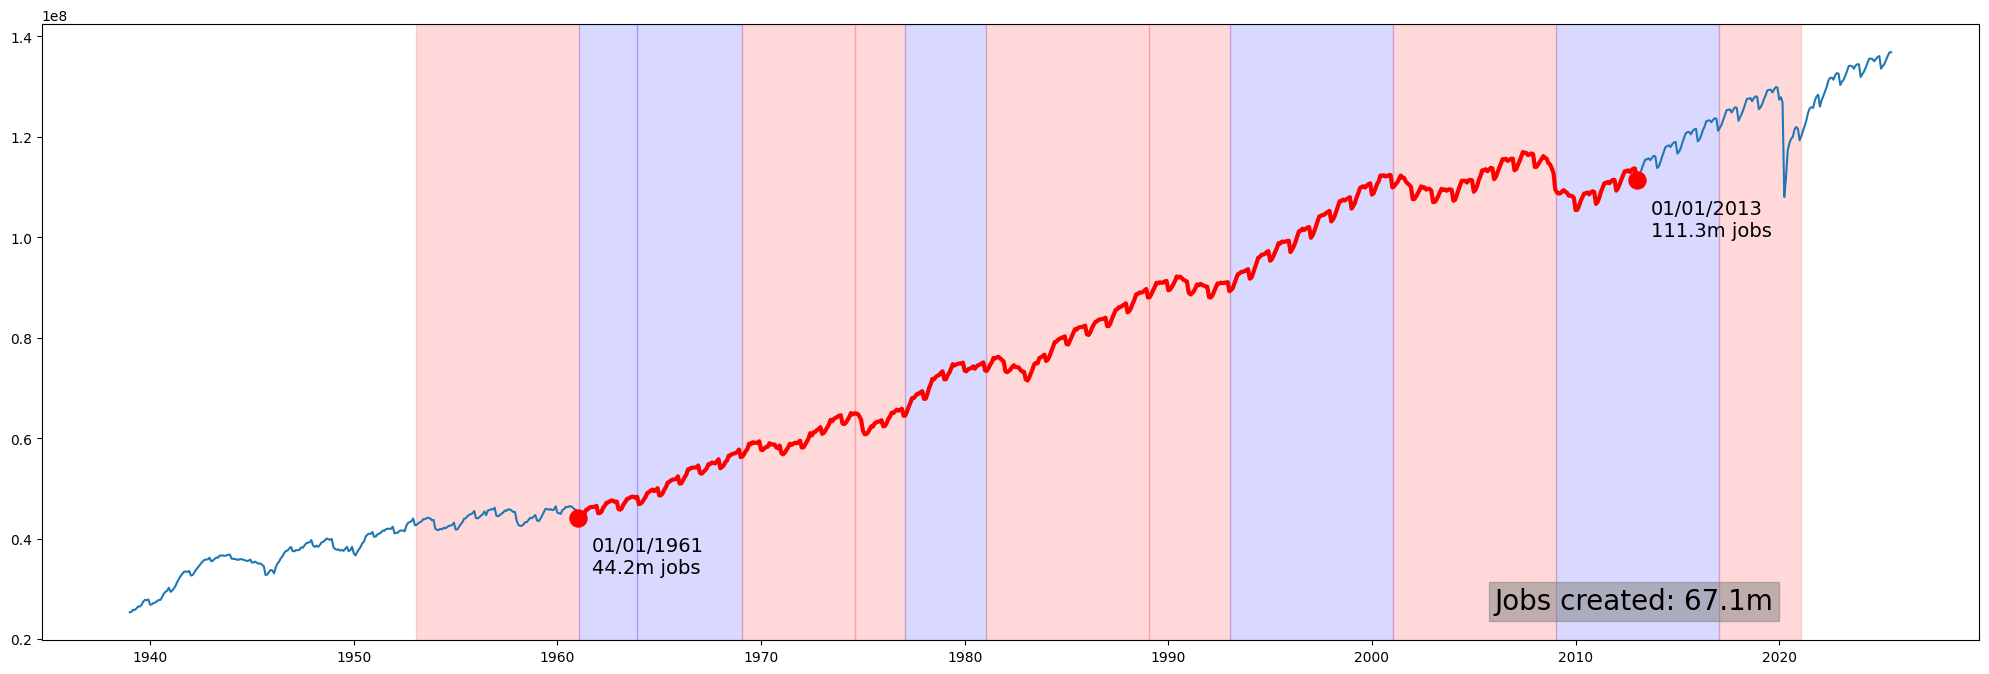

In [177]:

graph_1 = get_graph_highlighting_parties(monthly_jobs, presidents_filtered)
graph_3 = highlight_period(graph_1, (dt.date(1961, 1, 1), dt.date(2013, 1, 1)))

In [235]:

party_spans = {}
prev_party = None

for index, row in presidents.iterrows():
    term_start = row['term_start']
    term_end = row['term_end']
    party = row['party']

    if index == 0 or party != prev_party:
        party_spans[(term_start, term_end)] = party
    
    prev_party = party

In [ ]:
def find_party_job_growth(dates):

    # filter presidents df to presidents that have an end date after dates[0] and start date before dates[0]

    pres_s = presidents_filtered.copy()[
        (presidents_filtered['term_end'] >= dates[0]) &
        (presidents_filtered['term_start'] <= dates[1])
    ].sort_values(by="term_start").reset_index(drop=True)
    
    pres_s['term_start_fix'] = pres_s['term_start'].apply(
        lambda x: dt.date(x.year, x.month, 1) if x.day < 15 
        else dt.date(x.year, x.month, 1) + relativedelta(months=1)
    )

    pres_s['term_end_fix'] = pres_s['term_end'].apply(
        lambda x: dt.date(x.year, x.month, 1) if x.day < 15 
        else dt.date(x.year, x.month, 1) + relativedelta(months=1)
    )


    start_search = pres_s[
        (pres_s["term_start"] <= dates[0]) &
        (pres_s["term_end"] >= dates[0])    
    ]

    if start_search.empty or len(start_search) > 1:  # .empty not .empty()
        raise ValueError("Something went wrong when changing first president's term start fix")
    else:
        pres_s.loc[start_search.index[0], 'term_start_fix'] = dates[0]

    # Fix the last president's end date
    end_search = pres_s[
        (pres_s["term_start"] <= dates[1]) &
        (pres_s["term_end"] >= dates[1])    
    ]

    if end_search.empty or len(end_search) > 1:  # Changed from start_search to end_search
        raise ValueError("Something went wrong when changing last president's term end fix")
    else:
        pres_s.loc[end_search.index[0], 'term_end_fix'] = dates[1]



    pres_s['jobs_at_start'] = pres_s['term_start_fix'].apply(lambda x: monthly_jobs.get(x))
    pres_s['jobs_at_end'] = pres_s['term_end_fix'].apply(lambda x: monthly_jobs.get(x))

    pres_s['jobs_growth'] = pres_s.apply(lambda row: row['jobs_at_end'] - row['jobs_at_start'], axis=1)


    # display(pres_s[['name', 'term_start_fix', 'term_end_fix', 'jobs_at_start', 'jobs_at_end', "jobs_growth", 'party']])
    
    party_growth = {
        "republican": 0,
        "democratic": 0
    }
    for index, row in pres_s.iterrows():
        party_growth[row['party']] += row['jobs_growth']

    return party_growth


In [ ]:
def graph_party_jobs(self, party_jobs):
    """graph to show how many jobs were created during each party's term"""
    plt.figure(figsize=(10, 8))
    
    parties = ['Democrats', 'Republicans']
    
    # divide nubmer of jobs by the millions
    job_millions = [
        party_jobs['democratic']/1_000_000, 
        party_jobs['republican']/1_000_000
    ]

    # bar chart for each party's job numbers
    bars = plt.bar(
        parties,
        job_millions,
        color=['blue', 'red'],
    )

    # plot lables for each bar
    for i, (bar, value) in enumerate(zip(bars, job_millions)):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{value:.1f}M',
            ha='center',
            va='bottom',
        )
    
    plt.ylabel('Jobs Created', fontsize=12)
    plt.title('Jobs Created by Party')
    plt.grid(True, axis='y', alpha=0.3)


bar_graph = graph_party_jobs(par)
    

In [ ]:

# double check our calculations

start_date = dt.date(1961, 1, 1)
end_date = dt.date(2013, 1, 1)

job_growth_per_party = find_party_job_growth((start_date, end_date))
print(job_growth_per_party)
print("Sum of party growths:", job_growth_per_party['republican'] + job_growth_per_party['democratic'])

start_jobs = monthly_jobs.get(start_date)
end_jobs = monthly_jobs.get(end_date)
print("Total job growth:", end_jobs - start_jobs)

{'republican': 22644000, 'democratic': 44478000}
Sum of party growths: 67122000
Total job growth: 67122000


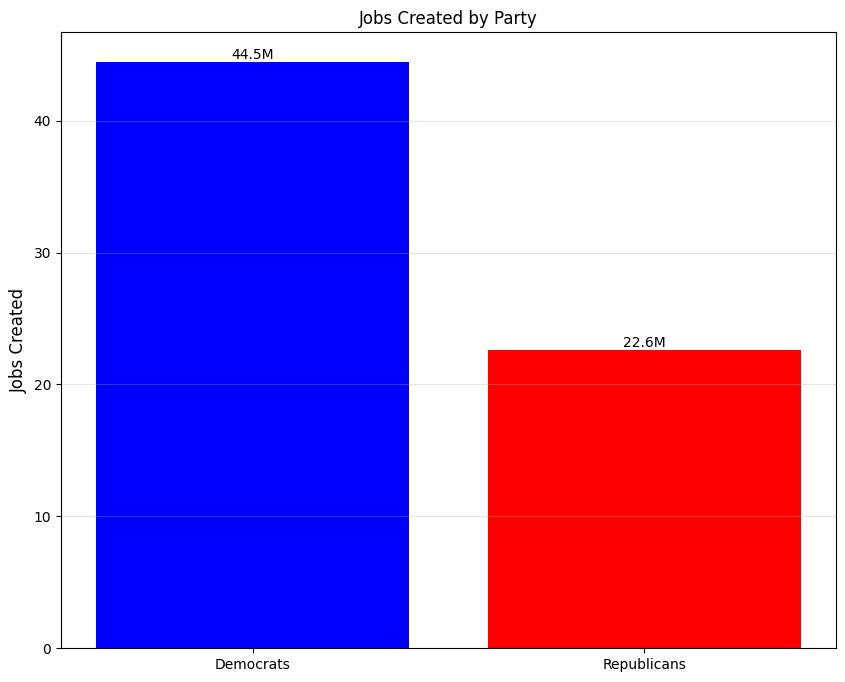

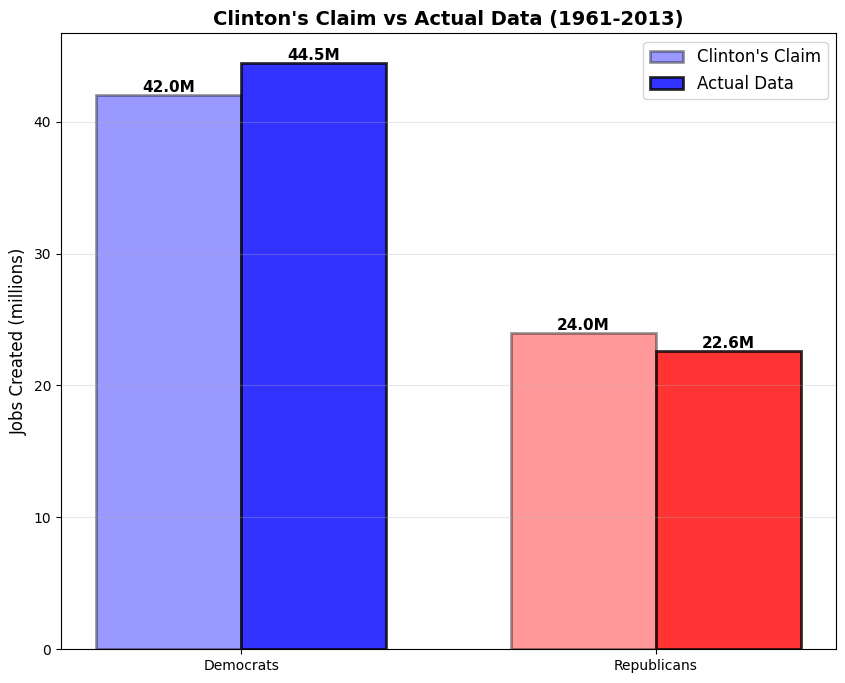

In [ ]:
# open and format jobs report (https://data.bls.gov/pdq/SurveyOutputServlet)
jobs = pd.read_csv("jobs.csv")

In [ ]:
# convert jobs table into a dictionarie, pairing months to number of jobs

monthly_jobs = {}

for index, row in jobs.iterrows():

    for x in range(1, 13):
        date = dt.date(int(row['Year']), x, 1)
        month = date.strftime("%b")

        num_jobs = row[month]

        try:
            monthly_jobs[date] = int(num_jobs) * 1000
        except:
            pass

In [ ]:
# convert jobs table into a dictionarie, pairing months to number of jobs

monthly_jobs = {}

for index, row in jobs.iterrows():

    for x in range(1, 13):
        date = dt.date(int(row['Year']), x, 1)
        month = date.strftime("%b")

        num_jobs = row[month]

        try:
            monthly_jobs[date] = int(num_jobs) * 1000
        except:
            pass

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(monthly_jobs.keys(), monthly_jobs.values(), color="skyblue", linewidth=2)

# Highlight specific years with vertical bars
years_to_highlight = [2020, 2022]  # Change these to whatever years you want

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents.iterrows():
    term_start = row.get("term_start")
    term_end = row.get("term_end")
    party = row.get("party")

    # dont highlight years before 1960
    if term_start < dt.datetime(1961, 1, 1):
        continue

    # dont highlight years after 2013
    if term_start > dt.datetime(2012, 1, 1):
        continue
    
    # print(party in color_map.keys())
    if party not in color_map.keys():
        print(f"{row.get('name'):<30} {party}")
        continue


    color = color_map.get(party)

    try:
        plt.axvspan(term_start, term_end, alpha=0.1, color=color)
    except:
        # print(row)
        pass

# for year in years_to_highlight:
#     start_date = dt.date(year, 1, 1)
#     end_date = dt.date(year, 12, 31)
#     plt.axvspan(start_date, end_date, alpha=0.3, color='red', label=f'Year {year}')

In [ ]:
monthly_jobs_change = {}

month_keys = sorted(monthly_jobs.keys())


for i, key in enumerate(month_keys):
    if i == 0:
        continue

    change = monthly_jobs[month_keys[i]] - monthly_jobs[month_keys[i-1]]

    monthly_jobs_change[key] = change


# monthly_jobs_change

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(monthly_jobs_change.keys(), monthly_jobs_change.values(), color="skyblue", linewidth=2)

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Highlight specific years with vertical bars
years_to_highlight = [2020, 2022]

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents.iterrows():
    term_start = row.get("term_start")
    term_end = row.get("term_end")
    party = row.get("party")

    # dont highlight years before 1960
    if term_start < dt.datetime(1961, 1, 1):
        continue

    # dont highlight years after 2013
    if term_start > dt.datetime(2012, 1, 1):
        continue
    
    # print(party in color_map.keys())
    if party not in color_map.keys():
        print(f"{row.get('name'):<30} {party}")
        continue


    color = color_map.get(party)

    try:
        plt.axvspan(term_start, term_end, alpha=0.1, color=color)
    except:
        # print(row)
        pass

    # After the loop, add custom legend entries
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', alpha=0.1, label='Democratic'),
    Patch(facecolor='red', alpha=0.1, label='Republican')
]
plt.legend(handles=legend_elements, loc='best')

# for year in years_to_highlight:
#     start_date = dt.date(year, 1, 1)
#     end_date = dt.date(year, 12, 31)
#     plt.axvspan(start_date, end_date, alpha=0.3, color='red', label=f'Year {year}')

In [ ]:
presidents_w_jobs = presidents.copy()


def find_last_date(date):
    filtered_keys = [k for k in month_keys if k <= date]
    return max(filtered_keys) if filtered_keys else None

presidents_w_jobs['jobs_term_start'] = presidents_w_jobs['term_start'].apply(lambda x: monthly_jobs.get(find_last_date(x.date())))

In [ ]:
presidents_w_jobs = presidents.copy()


def find_last_date(date):
    filtered_keys = [k for k in month_keys if k <= date]
    return max(filtered_keys) if filtered_keys else None

presidents_w_jobs['jobs_term_start'] = presidents_w_jobs['term_start'].apply(lambda x: monthly_jobs.get(find_last_date(x.date())))

plt.figure(figsize=(25, 8))
plt.plot(presidents_w_jobs['term_start'], presidents_w_jobs['jobs_term_start'], color="skyblue", linewidth=2)

# Highlight specific years with vertical bars
years_to_highlight = [2020, 2022]  # Change these to whatever years you want

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents.iterrows():
    term_start = row.get("term_start")
    term_end = row.get("term_end")
    party = row.get("party")

    # dont highlight years before 1960
    if term_start < dt.datetime(1961, 1, 1):
        continue

    # dont highlight years after 2013
    if term_start > dt.datetime(2012, 1, 1):
        continue
    
    # print(party in color_map.keys())
    if party not in color_map.keys():
        print(f"{row.get('name'):<30} {party}")
        continue


    color = color_map.get(party)

    try:
        plt.axvspan(term_start, term_end, alpha=0.1, color=color)
    except:
        # print(row)
        pass

In [ ]:
presidents_w_jobs = presidents.copy()


def find_last_date(date):
    filtered_keys = [k for k in month_keys if k <= date]
    return max(filtered_keys) if filtered_keys else None

presidents_w_jobs['jobs_term_start'] = presidents_w_jobs['term_start'].apply(lambda x: monthly_jobs.get(find_last_date(x.date())))

plt.figure(figsize=(25, 8))
plt.plot(presidents_w_jobs['term_start'], presidents_w_jobs['jobs_term_start'], color="skyblue", linewidth=2)

# Highlight specific years with vertical bars
years_to_highlight = [2020, 2022]  # Change these to whatever years you want

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents.iterrows():
    term_start = row.get("term_start")
    term_end = row.get("term_end")
    party = row.get("party")

    # dont highlight years before 1960
    if term_start < dt.datetime(1961, 1, 1):
        continue

    # dont highlight years after 2013
    if term_start > dt.datetime(2012, 1, 1):
        continue
    
    # print(party in color_map.keys())
    if party not in color_map.keys():
        print(f"{row.get('name'):<30} {party}")
        continue


    color = color_map.get(party)

    try:
        plt.axvspan(term_start, term_end, alpha=0.1, color=color)
    except:
        # print(row)
        pass

years_to_highlight = [1961, 2013]

for year in years_to_highlight:
    target_date = dt.datetime(year, 1, 1)
    
    # Find the closest term start to this year
    presidents_w_jobs['date_diff'] = abs((presidents_w_jobs['term_start'] - target_date).dt.days)
    closest_row = presidents_w_jobs.loc[presidents_w_jobs['date_diff'].idxmin()]
    
    x = closest_row['term_start']
    y = closest_row['jobs_term_start']
    
    # Add a marker
    plt.scatter(x, y, color='red', s=100, zorder=5)
    
    # Add annotation with the value
    plt.annotate(f'{year}\n{y:,.0f}', 
                xy=(x, y), 
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

In [ ]:
# load and format presidents file
presidents = pd.read_csv("countries_main_1765256462720.csv")
for col in ['term_start', 'term_end']:
    presidents[col] = pd.to_datetime(presidents[col], format="%Y%m%d")

presidents['party'] = presidents['party'].apply(lambda x: x.lower().strip())
presidents = presidents[["name", "term_start", "term_end", "party"]]

# load jobs data
jobs = pd.read_csv("jobs.csv")

In [ ]:

monthly_jobs = {}

for index, row in jobs.iterrows():
    for x in range(1, 13):
        date = dt.date(int(row['Year']), x, 1)
        month = date.strftime("%b")
        num_jobs = row[month]
        
        try:
            monthly_jobs[date] = int(num_jobs) * 1000
        except:
            pass

month_keys = sorted(monthly_jobs.keys())

def get_jobs_at_date(target_date):
    filtered_keys = [k for k in month_keys if k <= target_date]
    if filtered_keys:
        closest_date = max(filtered_keys)
        return monthly_jobs[closest_date]
    return None

jan_1961 = get_jobs_at_date(dt.date(1961, 1, 1))
jan_2013 = get_jobs_at_date(dt.date(2013, 1, 1))
total_jobs_created = jan_2013 - jan_1961

presidents_filtered = presidents[
    (presidents['term_start'] >= dt.datetime(1961, 1, 1)) &
    (presidents['term_start'] < dt.datetime(2013, 1, 21))
].copy()

party_jobs = {'democratic': 0, 'republican': 0}
for index, row in presidents_filtered.iterrows():
    name = row['name']
    term_start = row['term_start'].date()
    term_end = row['term_end'].date()
    party = row['party']

    jobs_start = get_jobs_at_date(term_start)
    jobs_end = get_jobs_at_date(term_end)

    if jobs_start and jobs_end:
        jobs_created = jobs_end - jobs_start
        
        if party in ['democratic', 'republican']:
            party_jobs[party] += jobs_created
            
plt.figure(figsize=(25, 8))
plt.plot(monthly_jobs.keys(), monthly_jobs.values())

plt.scatter(
    [dt.date(1961, 1, 1), dt.date(2013, 1, 1)],
    [jan_1961, jan_2013], 
    color='red',
    s=100,
    zorder=5,
    marker='o'
)

plt.annotate(
    f'1961\n{jan_1961/1_000_000}m jobs',
    xy=(dt.date(1961, 1, 1), jan_1961), 
    xytext=(0, -30),
    textcoords='offset points'
)

# Add label for 2013
plt.annotate(
    f'2013\n{jan_2013/1_000_000}m jobs',
    xy=(dt.date(2013, 1, 1), jan_2013),
    xytext=(0, -30),
    textcoords='offset points'
)

legend_elements = [
    Patch(facecolor='none', edgecolor='none', 
          label=f'Jobs created: {(jan_2013 - jan_1961)/1_000_000:.1f}m')
]

plt.text(
    0.905,
    0.05, 
    f'Jobs created: {(jan_2013 - jan_1961)/1_000_000:.1f}m',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox={
        "alpha": 0.5
    }
)

plt.ylabel('Total Jobs', fontsize=12)


In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(monthly_jobs.keys(), monthly_jobs.values())

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents_filtered.iterrows():
    term_start = row['term_start']
    term_end = row['term_end']
    party = row['party']
    
    if party in color_map:
        color = color_map[party]
        plt.axvspan(term_start, term_end, alpha=0.15, color=color)

plt.legend(
    handles=[
        Patch(facecolor='blue', alpha=0.15, label='Democratic'),
        Patch(facecolor='red', alpha=0.15, label='Republican')
    ],
    loc='upper left',
    fontsize=12
)

plt.scatter(
    [dt.date(1961, 1, 1), dt.date(2013, 1, 1)],
    [jan_1961, jan_2013], 
    color='red',
    s=100,
    zorder=5,
    marker='o'
)
plt.ylabel('Total Jobs', fontsize=12)

In [ ]:
presidents_w_jobs = presidents.copy()


def find_last_date(date):
    filtered_keys = [k for k in month_keys if k <= date]
    return max(filtered_keys) if filtered_keys else None

presidents_w_jobs['jobs_term_start'] = presidents_w_jobs['term_start'].apply(lambda x: monthly_jobs.get(find_last_date(x.date())))

plt.figure(figsize=(25, 8))
plt.plot(presidents_w_jobs['term_start'], presidents_w_jobs['jobs_term_start'], color="skyblue", linewidth=2)

# Highlight specific years with vertical bars
years_to_highlight = [2020, 2022]  # Change these to whatever years you want

color_map = {
    "democratic": "blue",
    "republican": "red"
}

for index, row in presidents.iterrows():
    term_start = row.get("term_start")
    term_end = row.get("term_end")
    party = row.get("party")

    # dont highlight years before 1960
    if term_start < dt.datetime(1961, 1, 1):
        continue

    # dont highlight years after 2013
    if term_start > dt.datetime(2012, 1, 1):
        continue
    
    # print(party in color_map.keys())
    if party not in color_map.keys():
        print(f"{row.get('name'):<30} {party}")
        continue


    color = color_map.get(party)

    try:
        plt.axvspan(term_start, term_end, alpha=0.1, color=color)
    except:
        # print(row)
        pass

years_to_highlight = [1961, 2013]

for year in years_to_highlight:
    target_date = dt.datetime(year, 1, 1)
    
    presidents_w_jobs['date_diff'] = abs((presidents_w_jobs['term_start'] - target_date).dt.days)
    closest_row = presidents_w_jobs.loc[presidents_w_jobs['date_diff'].idxmin()]
    
    x = closest_row['term_start']
    y = closest_row['jobs_term_start']
    
    plt.scatter(x, y, color='red', s=100, zorder=5)
    
    plt.annotate(
        f'{year}\n{y:,.0f}', 
        xy=(x, y), 
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )

In [ ]:
plt.figure(figsize=(10, 8))

parties = ['Democrats', 'Republicans']
job_millions = [
    party_jobs['democratic']/1_000_000, party_jobs['republican']/1_000_000]
colors = ['blue', 'red']

bars = plt.bar(parties, job_millions, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
for i, (bar, value) in enumerate(zip(bars, job_millions)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}M',
            ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.ylabel('Jobs Created (millions)', fontsize=12)
plt.title('Jobs Created by Party (1961-2013)', fontsize=14, fontweight='bold')
plt.grid(True, axis='y', alpha=0.3)

In [ ]:

import numpy as np
plt.figure(figsize=(10, 8))
x = np.arange(2)
width = 0.35

clinton_claim = [42, 24]
actual_values = [
    party_jobs['democratic'] / 1_000_000,
    party_jobs['republican'] / 1_000_000
]

bars1 = plt.bar(
    x - width/2,
    clinton_claim,
    width,
    label='Clinton\'s Claim',
    color=['blue', 'red'],
    alpha=0.4,
    edgecolor='black',
    linewidth=2
)

bars2 = plt.bar(
    x + width / 2,
    actual_values,
    width,
    label='Actual Data',
    color=['blue', 'red'],
    alpha=0.8,
    edgecolor='black',
    linewidth=2
)

plt.ylabel('Jobs Created', fontsize=12)
plt.title("Clinton's Claim vs Actual Data (1961-2013)", fontsize=14, fontweight='bold')
plt.xticks(x, ['Democrats', 'Republicans'])
plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{height:.1f}M',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

In [ ]:


# ax1.annotate(
#     f'1961\n{jan_1961:,} jobs', 
#     xy=(dt.date(1961, 1, 1), jan_1961), 
#     xytext=(-50, 30),
#     textcoords='offset points',
#     ha='center',
#     fontsize=12,
#     bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
#     arrowprops={
#         "arrowstyle": "->",
#         "color": "red",
#         "lw":2
#     }
# )


# ax1.annotate(f'2013\n{jan_2013:,} jobs\n\n+{total_jobs_created:,}', 
#             xy=(dt.date(2013, 1, 1), jan_2013), 
#             xytext=(50, -50),
#             textcoords='offset points',
#             ha='center',
#             fontsize=12,
#             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
#             arrowprops=dict(arrowstyle='->', color='red', lw=2))


# ax1.set_title(f'Total Employment: 1961 vs 2013\n({total_jobs_created/1_000_000:.1f} million jobs created)', 
#               fontsize=14, fontweight='bold')
# ax1.set_ylabel('Total Jobs', fontsize=12)
# ax1.grid(True, alpha=0.3)
# ax1.set_xlim(dt.date(1955, 1, 1), dt.date(2020, 1, 1))





# Graph 2: Employment with party shading (1961-2013)
ax2 = axes[0, 1]
ax2.plot(monthly_jobs.keys(), monthly_jobs.values())

color_map = {"democratic": "blue", "republican": "red"}
for index, row in presidents_filtered.iterrows():
    term_start = row['term_start']
    term_end = row['term_end']
    party = row['party']
    
    if party in color_map:
        color = color_map[party]
        ax2.axvspan(term_start, term_end, alpha=0.15, color=color)

legend_elements = [
    Patch(facecolor='blue', alpha=0.1, label='Democratic'),
    Patch(facecolor='red', alpha=0.1, label='Republican')
]
# ax2.legend(handles=legend_elements, loc='upper left', fontsize=12)
# ax2.set_title('Employment by Presidential Party (1961-2013)', fontsize=14, fontweight='bold')
# ax2.set_ylabel('Total Jobs', fontsize=12)
# ax2.grid(True, alpha=0.3)
# ax2.set_xlim(dt.date(1961, 1, 1), dt.date(2013, 12, 31))

# Graph 3: Bar chart comparing party job creation
ax3 = axes[1, 0]
parties = ['Democrats', 'Republicans']
job_millions = [party_jobs['democratic']/1_000_000, party_jobs['republican']/1_000_000]
colors = ['blue', 'red']

bars = ax3.bar(parties, job_millions, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
for i, (bar, value) in enumerate(zip(bars, job_millions)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}M',
            ha='center', va='bottom', fontsize=16, fontweight='bold')

ax3.set_ylabel('Jobs Created (millions)', fontsize=12)
ax3.set_title('Jobs Created by Party (1961-2013)', fontsize=14, fontweight='bold')
ax3.grid(True, axis='y', alpha=0.3)
ax3.set_ylim(0, max(job_millions) * 1.15)

# Graph 4: Clinton's claim vs actual
ax4 = axes[1, 1]
x = np.arange(2)
width = 0.35

clinton_claim = [42, 24]  # Democrats, Republicans
actual_values = [party_jobs['democratic']/1_000_000, party_jobs['republican']/1_000_000]

bars1 = ax4.bar(x - width/2, clinton_claim, width, label='Clinton\'s Claim', 
                color=['blue', 'red'], alpha=0.4, edgecolor='black', linewidth=2)
bars2 = ax4.bar(x + width/2, actual_values, width, label='Actual Data',
                color=['blue', 'red'], alpha=0.8, edgecolor='black', linewidth=2)

ax4.set_ylabel('Jobs Created (millions)', fontsize=12)
ax4.set_title('Clinton\'s Claim vs Actual Data (1961-2013)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(['Democrats', 'Republicans'])
ax4.legend(fontsize=12)
ax4.grid(True, axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}M',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('job_creation_analysis.png', dpi=150, bbox_inches='tight')
print("\nVisualization saved!")
print("\nSummary:")
print(f"1. 66 million jobs claim: Actual = {total_jobs_created/1_000_000:.1f} million")
print(f"2. Democratic presidents: {party_jobs['democratic']/1_000_000:.1f} million jobs")
print(f"3. Republican presidents: {party_jobs['republican']/1_000_000:.1f} million jobs")
print(f"4. Clinton's claim (42M D, 24M R): Close but not exact")